# RENAMING SHOTS AND COMBINING TO SINGLE SHOT FILE

In [1]:
import numpy as np
import os
import segyio
import glob

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot, traceimage

%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
proj_dir = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/explosive_multishot/UtahFORGE_GriddedRecs'
seispath = os.path.join(proj_dir,'outputs/su')
sourcepath = os.path.join(proj_dir,'inputs/multishot_sources') 
print(sourcepath)
expname = 'multishot_group19'

/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/explosive_multishot/UtahFORGE_GriddedRecs/inputs/multishot_sources


In [8]:
shotfiles = sorted(glob.glob(seispath+'/*vz*'))
print(len(shotfiles))

8271


In [23]:
source_loc = []

for file in shotfiles[:2]:
    # get group and shot id
    descr_str = file.split('/')[-1]
    group = int(descr_str.split('_')[1][5:])
    shot = int(descr_str.split('.')[-1][4:])
    print(descr_str, group, shot)

    # read corresponding source file
    srcs = np.loadtxt(os.path.join(sourcepath,'multishot_group%.2i.dat'%group))
    print(len(srcs))

multishot_group00_vz.txt.shot1 0 1
8000
multishot_group00_vz.txt.shot10 0 10
8000


# PARAMETERS TO BE DEFINED

In [3]:
nr = 210
nt = 1000
n_srcs = 200

# SEISMOGRAMS

In [4]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

In [5]:
vx = np.zeros([n_srcs, nr, nt])
vy = np.zeros([n_srcs, nr, nt])
vz = np.zeros([n_srcs, nr, nt])
for i,srcnum in enumerate(range(n_srcs)):    
    vx[i]  = read_seis(os.path.join(seispath,'%s_vx.txt.shot%.i'%(expname,srcnum+1)), nr)
    vy[i]  = read_seis(os.path.join(seispath,'%s_vy.txt.shot%i'%(expname,srcnum+1)), nr)
    vz[i]  = read_seis(os.path.join(seispath,'%s_vz.txt.shot%i'%(expname,srcnum+1)), nr)


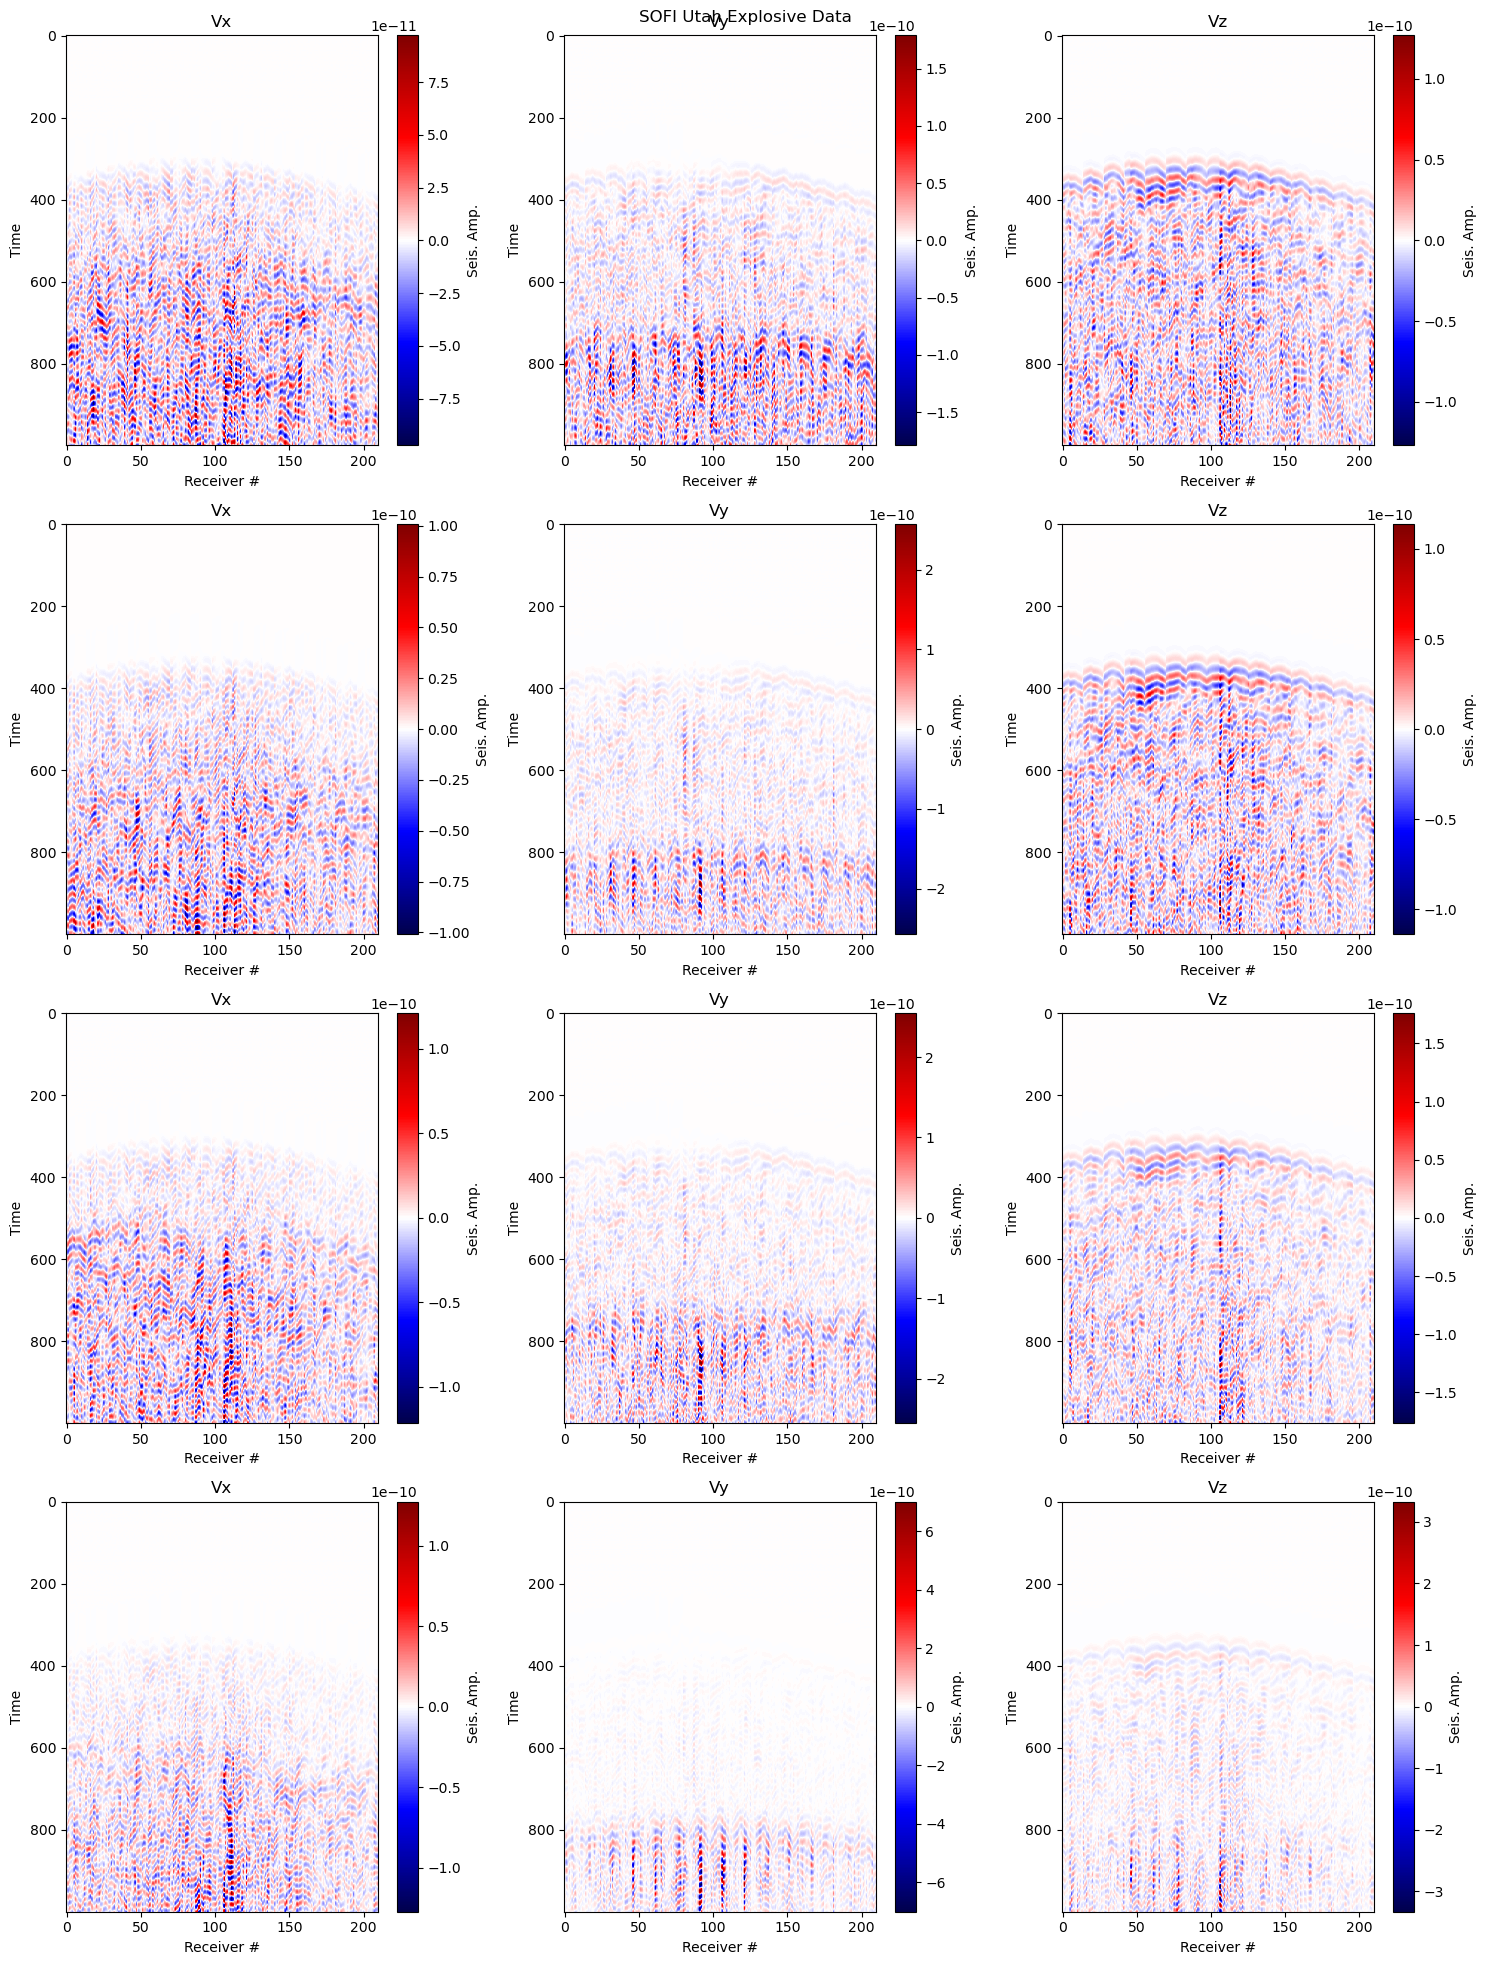

In [6]:
fig,axs = plt.subplots(4,3,figsize=[15,20])
for i in range(4):
    traceimage(vx[i*50], climQ=99.99, ax=axs[i,0])
    traceimage(vz[i*50], climQ=99.99, ax=axs[i,1])
    traceimage(vy[i*50], climQ=99.99, ax=axs[i,2])
    
for ax in axs[:,0]:ax.set_title('Vx')
for ax in axs[:,1]:ax.set_title('Vy')
for ax in axs[:,2]:ax.set_title('Vz')

plt.suptitle('SOFI Utah Explosive Data')
plt.tight_layout()